# import libraries

In [45]:
import tensorflow as tf
from tensorflow import keras 
print(tf.__version__)

import matplotlib.pyplot as plt
import numpy as np


2.2.0-rc2


# define helper functions

In [0]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel('time')
  plt.ylabel(metric)
  plt.grid(True)
  print('blue: {}'.format(metric))
  print('orange: {}'.format('val_'+metric))

# get dataset

In [0]:
mnist = tf.keras.datasets.mnist

# preprocess dataset

In [0]:
# split into training & validation
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize the dataset (organize between 0-1)
# max_num_pixels per img= 255 float
x_train, x_test= x_train/255.0, x_test/255.0

# define the model

In [49]:
model = keras.Sequential([
  # flatten the input_shape into a 1D vector=a column of total_pixels
  # img format=(28,28)
  keras.layers.Flatten(input_shape=(28,28)),
  # a fully-connected dense layer that maps inputs to outputs to id optimal weights
  # 512 neurons
  # relu: return x if x > 0, else return 0
  keras.layers.Dense(units=512, activation='relu'),
  # the output layer neurons needs to match the number of possible predictions
  # softmax activation: organizes the predictions into a valid distribution of 100%
    # selects prediction with the highest possibility
  keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# compile the model

build the model by compiling it with a loss, optimizer, and objective metrics

In [0]:
# use spare_categorical_crossentropy, because its multinomial classification problem
  # that has missing data
# adam optimizer is the best default optimizer
# accuracy metrics is used for multinomial problems and can be used in callback
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# define callbacks

In [0]:
# define enableearly stopping callback
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.99):
      print('\nstopping training, accuracy > 99%')
      self.model.stop_training = True

# instantiate callbacks
callbacks = myCallback()

# train the model

fit the model to train & learn the relationships

In [52]:
# .fit(observations, labels, epochs, callbacks, validation_dataset, verbose_logs)
# assign history var to trained model for performance querying
history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks], validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1997 - accuracy: 0.9416 - val_loss: 0.1024 - val_accuracy: 0.9684
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0792 - accuracy: 0.9756 - val_loss: 0.0800 - val_accuracy: 0.9764
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0739 - val_accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0713 - val_accuracy: 0.9783
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0285 - accuracy: 0.9909
stopping training, accuracy > 99%
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0705 - val_accuracy: 0.9791


# visualize performance

blue: accuracy
orange: val_accuracy


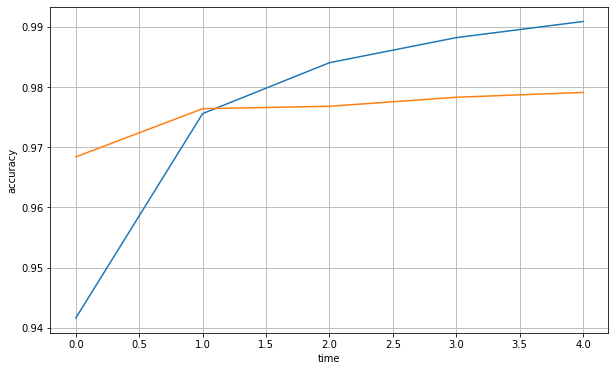

In [59]:
plt.figure(figsize=(10,6))
plot_graphs(history, 'accuracy')
plt.show()

# clean up

terminate memory cell to free up resources

In [0]:
import os, signal

os.kill(os.getpid(), signal.SIGKILL)